
<img src="1200px-University_of_Tehran_logo.svg.png" width="100" style="float:left;"/>

<img src="fanni.png" width="110" style="float:right;"/>


<h1 style="float: center; text-align: center;"> Navid Akbari 810895023 </h1>

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

###### Reading data from file and write them to the data

In [2]:
data = pd.read_csv("AdmissionPredict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1,NaN
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65
5,6,330.0,115.0,5,4.5,3.0,9.34,1,0.90
6,7,321.0,109.0,3,3.0,4.0,NaN,1,0.75
7,8,308.0,101.0,2,3.0,4.0,7.90,0,0.68
8,9,302.0,102.0,1,2.0,1.5,8.00,0,0.50
9,10,323.0,108.0,3,3.5,3.0,8.60,0,0.45


###### Showing the first 5 data of dataset

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1,NaN
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,378.000000,380.000000,400.000000,400.000000,400.000000,380.000000,400.000000,384.000000
mean,200.500000,316.759259,107.386842,3.087500,3.400000,3.452500,8.604737,0.547500,0.724375
std,115.614301,11.415599,6.048645,1.143728,1.006869,0.898478,0.599167,0.498362,0.142964
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.250000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.640000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.080000,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            378 non-null float64
TOEFL Score          380 non-null float64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 380 non-null float64
Research             400 non-null int64
Chance of Admit      384 non-null float64
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


###### Counting number of NaN data in each column of the dataset

In [6]:
data.isnull().sum()

Serial No.            0
GRE Score            22
TOEFL Score          20
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit      16
dtype: int64

##### choosing which column should check for substitution of the NaN values with the mean of that column

In [7]:
values = {'GRE Score': int(data['GRE Score'].mean()), 'TOEFL Score': int(data['TOEFL Score'].mean()), 'CGPA': data['CGPA'].mean()}
values

{'GRE Score': 316, 'TOEFL Score': 107, 'CGPA': 8.604736842105263}

##### substitution of NaN value with the mean of that column

In [8]:
data = data.fillna(value=values)
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.650000,1,0.92
1,2,324.0,107.0,4,4.0,4.5,8.870000,1,NaN
2,3,316.0,107.0,3,3.0,3.5,8.000000,1,0.72
3,4,316.0,110.0,3,3.5,2.5,8.670000,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.210000,0,0.65
5,6,330.0,115.0,5,4.5,3.0,9.340000,1,0.90
6,7,321.0,109.0,3,3.0,4.0,8.604737,1,0.75
7,8,308.0,101.0,2,3.0,4.0,7.900000,0,0.68
8,9,302.0,102.0,1,2.0,1.5,8.000000,0,0.50
9,10,323.0,108.0,3,3.5,3.0,8.600000,0,0.45


##### Checking that the code is runnig well

In [9]:
data.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit      16
dtype: int64

##### Drawing plots of Chance of Admit based on different columns of the dataset using matplotlib and subplot

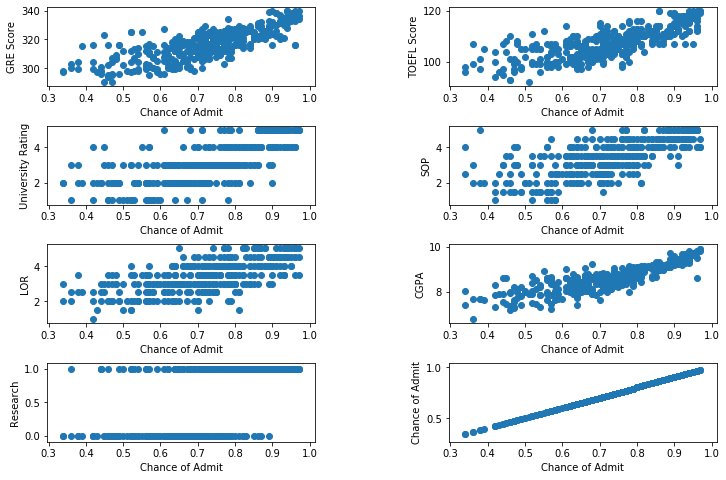

In [10]:
colors = (0,0,0)
area = np.pi*3
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.gcf().set_size_inches(plt.gcf().get_size_inches()[0]*2, plt.gcf().get_size_inches()[1]*2, forward=True)
# Plot
plt.subplot(4, 2, 1)
plt.scatter(data['Chance of Admit'], data['GRE Score'])
plt.xlabel('Chance of Admit')
plt.ylabel('GRE Score')

plt.subplot(4, 2, 2)
plt.scatter(data['Chance of Admit'], data['TOEFL Score'])
plt.xlabel('Chance of Admit')
plt.ylabel('TOEFL Score')

plt.subplot(4, 2, 3)
plt.scatter(data['Chance of Admit'], data['University Rating'])
plt.xlabel('Chance of Admit')
plt.ylabel('University Rating')

plt.subplot(4, 2, 4)
plt.scatter(data['Chance of Admit'], data['SOP'])
plt.xlabel('Chance of Admit')
plt.ylabel('SOP')

plt.subplot(4, 2, 5)
plt.scatter(data['Chance of Admit'], data['LOR '])
plt.xlabel('Chance of Admit')
plt.ylabel('LOR')

plt.subplot(4, 2, 6)
plt.scatter(data['Chance of Admit'], data['CGPA'])
plt.xlabel('Chance of Admit')
plt.ylabel('CGPA')

plt.subplot(4, 2, 7)
plt.scatter(data['Chance of Admit'], data['Research'])
plt.xlabel('Chance of Admit')
plt.ylabel('Research')

plt.subplot(4, 2, 8)
plt.scatter(data['Chance of Admit'], data['Chance of Admit'])
plt.xlabel('Chance of Admit')
plt.ylabel('Chance of Admit')


plt.show()

#### For finding the column that has the most correlation with Chance of Admit column, I use corr() function, which calculates the correlation of two different data. After the calculation of the correlation, we can see from the result that the __CGPA__ metric has the most correlation with Chance of Admit. 

<div>
<img src="Correlation-Coefficient-Formula-2.jpg" width="400" style="float:center;"/>
</div>

#### As shown in above, correlation formula coefficient calculated using the above formula. 



#### The meaning of different results in correlation coefficient are:
* A correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other. For example, shoe sizes go up in (almost) perfect correlation with foot length.

* A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other. For example, the amount of gas in a tank decreases in (almost) perfect correlation with speed.

* Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related.

#### So we should find the most positive number in our results. Hence, __CGPA__ with 0.85 correlation coefficient is the best metric.

In [11]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.102429,-0.157229,-0.169948,-0.166932,-0.088221,-0.062254,-0.063138,0.047057
GRE Score,-0.102429,1.000000,0.804004,0.659280,0.599359,0.543458,0.794262,0.571368,0.784770
TOEFL Score,-0.157229,0.804004,1.000000,0.681340,0.633807,0.555214,0.799132,0.498590,0.758711
University Rating,-0.169948,0.659280,0.681340,1.000000,0.734523,0.660123,0.733424,0.447783,0.707191
SOP,-0.166932,0.599359,0.633807,0.734523,1.000000,0.729593,0.695528,0.444029,0.680752
LOR,-0.088221,0.543458,0.555214,0.660123,0.729593,1.000000,0.660742,0.396859,0.663452
CGPA,-0.062254,0.794262,0.799132,0.733424,0.695528,0.660742,1.000000,0.514092,0.855675
Research,-0.063138,0.571368,0.498590,0.447783,0.444029,0.396859,0.514092,1.000000,0.548443
Chance of Admit,0.047057,0.784770,0.758711,0.707191,0.680752,0.663452,0.855675,0.548443,1.000000


##### Finding students that their minimum CGPA and TOEFL scores are 9 and 110, respectively.

In [12]:
filtered_student = data[(data['CGPA'] >= 9) & (data['TOEFL Score'] >= 110)];
filtered_student

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
5,6,330.0,115.0,5,4.5,3.0,9.34,1,0.90
11,12,316.0,111.0,4,4.0,4.5,9.00,1,0.84
12,13,328.0,112.0,4,4.0,4.5,9.10,1,0.78
22,23,328.0,116.0,5,5.0,5.0,9.50,1,0.94
23,24,334.0,119.0,5,5.0,4.5,9.70,1,0.95
24,25,336.0,119.0,5,4.0,3.5,9.80,1,0.97
25,26,340.0,120.0,5,4.5,4.5,9.60,1,0.94
32,33,338.0,118.0,4,3.0,4.5,9.40,1,0.91
33,34,340.0,114.0,5,4.0,4.0,9.60,1,0.90


In [13]:
print("Number of filtered student with given qualifications in dataframe : " , len(filtered_student))

Number of filtered student with given qualifications in dataframe :  97


##### Finding average scores of GRE in university with different level

In [14]:
grouped_data = data.groupby('University Rating');
grouped_data['GRE Score'].mean()

University Rating
1    303.153846
2    309.710280
3    315.894737
4    324.013514
5    327.916667
Name: GRE Score, dtype: float64

##### Making a new dataset out of the previous dataset by using two columns of it.

In [15]:
new_data = data[['CGPA', 'Chance of Admit']];
new_data

,CGPA,Chance of Admit
0,9.650000,0.92
1,8.870000,NaN
2,8.000000,0.72
3,8.670000,0.80
4,8.210000,0.65
5,9.340000,0.90
6,8.604737,0.75
7,7.900000,0.68
8,8.000000,0.50
9,8.600000,0.45


##### I am finding the coefficients of the Hypothesis Function by using the test and error method. I use the given data and find the minimum and maximum value for CGPA and Chance of Admit metrics. The given data in describe() method helps me find the minimum and maximum value for both metrics. CGPA minimum value is 6.800000, and the maximum value is 9.920000, Chance of Admit minimum value is 0.340000, and the maximum value is 0.970000, so I draw a line base on these data and find theta0 and theta1 for the Hypothesis Function. By calculating the MSE value for the predicated Y and actual Y, I found that I used good points for fitting the line on the dataset.

In [16]:
theta_0 = -1.0625;
theta_1 = 0.20625;
y_pred = theta_0 + theta_1*new_data['CGPA'];

np.square(np.subtract(new_data['Chance of Admit'],y_pred)).mean()/2

0.002802201581072611

##### Draw the predicated line and actual dataset

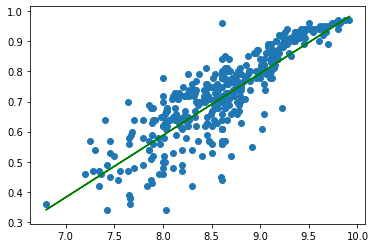

In [17]:
plt.scatter(new_data['CGPA'], new_data['Chance of Admit'])
plt.plot(new_data['CGPA'] , y_pred, color = "g") 
plt.show()

In [18]:
new_data[(np. isnan(new_data['Chance of Admit']))]

,CGPA,Chance of Admit
1,8.87,NaN
57,7.60,NaN
135,8.77,NaN
143,9.92,NaN
171,9.07,NaN
218,8.97,NaN
232,8.27,NaN
251,9.00,NaN
272,7.64,NaN
294,8.32,NaN


##### Replacing the NaN data with the value of the predicated Hypothesis Function

In [19]:
y_new = theta_0 + theta_1*new_data[(np. isnan(new_data['Chance of Admit']))]['CGPA']
y_new

1      0.766937
57     0.505000
135    0.746312
143    0.983500
171    0.808188
218    0.787562
232    0.643187
251    0.793750
272    0.513250
294    0.653500
315    0.601938
338    0.740125
357    0.564812
381    0.725687
390    0.637000
396    0.816437
Name: CGPA, dtype: float64